<a href="https://colab.research.google.com/github/ShubhPathania/Customer-Purchase-Behavior-Analysis/blob/main/Customer_Purchase_Behavior_Analysis_(Statistics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

## Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

## About the Dataset


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





## Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

### Clean and preprocess the dataset (handling missing values, data types, etc.).

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
try:
  df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AlmaBetter/Projects/Module - 5/Superstore Marketing Data.csv")
  print('Dataset loaded successfully.')
except:
  print("Some Error occured.")

Dataset loaded successfully.


In [4]:
# Dataset first view
first_view = pd.concat([df.head(), df.tail()])
first_view

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


In [5]:
# Dataset rows and columns count
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2240
Number of columns: 22


In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations**

Most of the columns are in correct datatype. As we can see the column `Dt_Customer` is in incorrect datatype, it should be in datetime datatype.



In [7]:
# Check for duplicate values
duplicate_count = df.duplicated().sum()
print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 0


In [8]:
# Check for null values
df_null = df.isnull().sum()
df_null

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

**Observations**

It can be observed that the 'Income' column has 24 missing values. To determine how to handle these, let us have a look at the distribution of the income data. If no suitable imputation method can be determined, we can simply drop those rows.

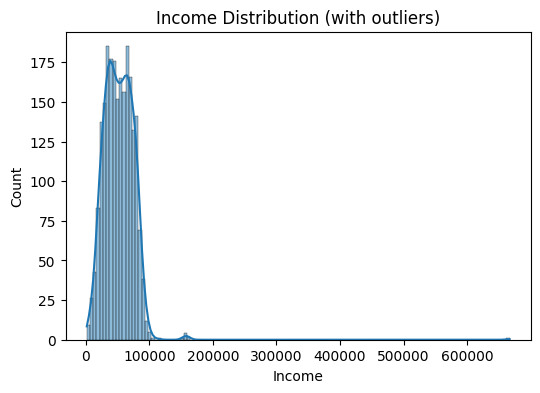

In [9]:
# Check the distribution of Income
income_with_outliers = df.copy()
plt.figure(figsize= (6, 4))

sns.histplot(data= income_with_outliers, x="Income", kde= True)
plt.xlabel("Income")
plt.title("Income Distribution (with outliers)")

plt.show()

From the distribution, it can be observed that the data in 'Income' column is positively skewed with most of the incomes falling in the range of 0 to 100000.

Let us calculate central tendency for Income.

In [10]:
def check_measure_central_tendency():
  """
  This function calculates the mean, median, and mode of the 'Income' column.

  Returns:
  mean_: Mean value of the 'Income' column.
  median_: Median value of the 'Income' column.
  mode_: Mode(s) of the 'Income' column.
  """
  mean_ = df["Income"].mean()
  median_ = df["Income"].median()
  mode_ = df["Income"].mode()

  return mean_, median_, mode_

mean_, median_, mode_ = check_measure_central_tendency()
print(f"Mean: {mean_:.2f}\nMedian: {median_}\nMode: {mode_}")

Mean: 52247.25
Median: 51381.5
Mode: 0    7500.0
Name: Income, dtype: float64


We can see here, that the mean is greater than median as the data is positively skewed. We could impute the missing income values with mean and median but for this analysis, we will simply drop the rows as the number of missing values is quite small.

**Data Cleaning:**

In [11]:
# Drop rows with missing values
df.dropna(subset= ["Income"], inplace= True)

In [12]:
# Check the null values after dropping the missing values
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [13]:
df.shape

(2216, 22)

In [14]:
# Proportion of income in the range of 0 to 100000
income_upto_100k = len(df[df["Income"] <= 100000]) / len(df) * 100

print(f"% of Customers whose income is in the range of 0 to 100000: {income_upto_100k:.2f}%")

% of Customers whose income is in the range of 0 to 100000: 99.41%


**Observations:**

Since 99.41% of all customers earn an income upto 100000, we can filter our data to include only such customers to understand the spending behaviours better.

In [15]:
# Rows with income greater than 100k
income_more_than_100k = df["Income"] > 100000

# Filter the DataFrame to exclude those rows
df = df[~income_more_than_100k]
df["Income"].size

2203

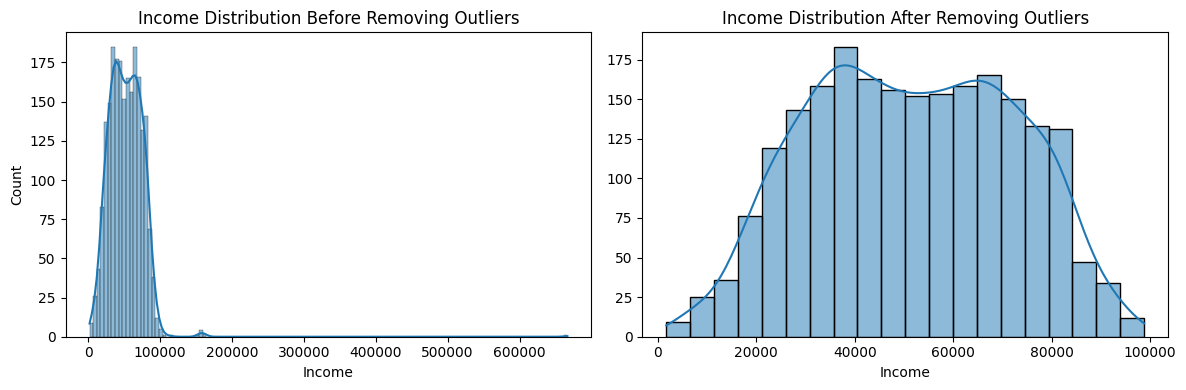

In [16]:
# Income distribution before and after removing outliers
plt.figure(figsize= (12, 4))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(data= income_with_outliers, x="Income", kde= True)
plt.title("Income Distribution Before Removing Outliers")

# After removing outliers
plt.subplot(1, 2, 2)
sns.histplot(data= df, x="Income", kde= True)
plt.title("Income Distribution After Removing Outliers")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [17]:
# Check unique values in 'Income' column
df['Income'].unique()

array([84835., 57091., 67267., ..., 46310., 65819., 94871.])

--> As observed earlier, the 'Dt_Customer' column was in the incorrect datatype, as it represents the day on which customer is enrolled with the company. But before that let us check the values in the 'Dt_Customer' column to ensure that all the values are valid dates.

In [18]:
df['Dt_Customer'].value_counts()

Dt_Customer
########      896
8/31/2012      12
2/14/2013      11
8/20/2013      10
5/22/2014      10
             ... 
10/19/2012      1
5/27/2013       1
6/13/2014       1
3/25/2013       1
5/25/2013       1
Name: count, Length: 400, dtype: int64

**Observations:**

It can be seen that there are 896 rows that do not contain valid dates. Let us convert them appropriately.

Since the data of customer enrollment spans the period from 2012 to 2014, we can use any date within this period. This will not significantly impact our analysis, especially when calculating customer demographics such as age. For consistency and ease of analysis, let's assume the most recent date as the enrollment date for these invalid entries.

In [19]:
def most_recent_date(df, column_name):
  """
  This function generates a DataFrame containing the most recent date from the dataframe's column.

  Args:
    df: A Pandas DataFrame object.
    column_name: Name of the df column which contains the incorrect date format.

  Returns:
    most_recent_date (type: datetime64): The most recent date from the df column.
    """

  # Filter out rows with correct date format
  valid_dates_df = df[df[column_name] != "########"]

  # Convert the column to datetime datatype
  valid_dates_df.loc[:, column_name] = pd.to_datetime(valid_dates_df[column_name])

  # Find the most recent date
  most_recent_date = valid_dates_df[column_name].max()

  return most_recent_date

# Get the most recent date
most_recent_date_value = most_recent_date(df, "Dt_Customer")
most_recent_date_value

Timestamp('2014-06-29 00:00:00')

In [20]:
# Impute this value in the original dataframe
df["Dt_Customer"] = df["Dt_Customer"].replace("########", most_recent_date_value)

# Convert the datatype to datetime type
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [21]:
# Lats check all the values again
df["Dt_Customer"].value_counts()

Dt_Customer
2014-06-29    898
2012-08-31     12
2013-02-14     11
2014-05-22     10
2013-08-20     10
             ... 
2012-10-19      1
2013-05-27      1
2014-03-28      1
2014-06-13      1
2013-05-25      1
Name: count, Length: 399, dtype: int64

### Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.

- In order to analyze the distribution of customer demographics based on age, we first need to calculate the age by using the following formula:
      Age = Dt_Customer - Year_Birth

In [22]:
# Extract year from enrollment date
enrollment_year = df["Dt_Customer"].dt.year

# Subtract birth year from enrollment year
df["Age"] = enrollment_year - df["Year_Birth"]
df["Age"]

0       44
1       53
2       56
3       47
4       25
        ..
2235    38
2236    36
2237    38
2238    34
2239    45
Name: Age, Length: 2203, dtype: int64

In [23]:
print("Descriptive Statistics for Age:\n")
df['Age'].describe()

Descriptive Statistics for Age:



count    2203.000000
mean       44.626419
std        12.021430
min        17.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

In [24]:
# Identify the customers with age eqaul to 121
age_121 = df[df['Age'] == 121]
age_121

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,1,1,0,2,4,0,0,121


**Observations:**

It can be observed from the above statistics table that the maximum age of a customer is 121, which is technically possible but seems odd. It is unlikely that a person of such age would go to superstore to buy stuff. Let us check the distribution of the 'Age' variable to identify such outliers.

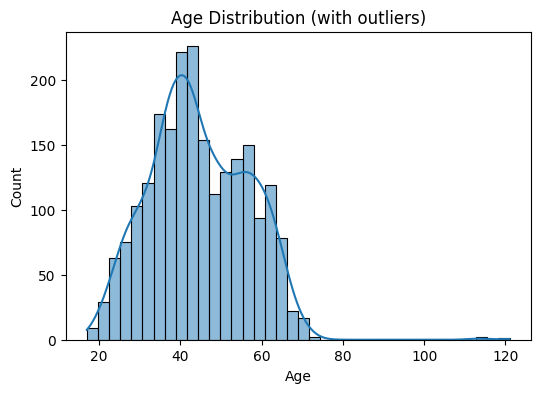

In [25]:
# Check the distribution of Age
age_with_outliers = df.copy()
plt.figure(figsize= (6, 4))

sns.histplot(data= age_with_outliers, x="Age", kde= True)
plt.xlabel("Age")
plt.title("Age Distribution (with outliers)")

plt.show()

From the distribution it can be observed that the data in 'Age' column is positively skewed with most of the ages falling in the range of 17 to 80.

> Assumption: The maximum age of customers is 80 years.

Based on this assumption, let us identify the customers with age greater than 80 (all these customers can be categorized as elderly) and drop these rows to reduce skewness from the data.

In [26]:
# Identify customers with age greater than 80
elderly_customers = df["Age"] > 80

# Filter the DataFrame to exclude those rows
df = df[~elderly_customers]
df["Age"].size

2200

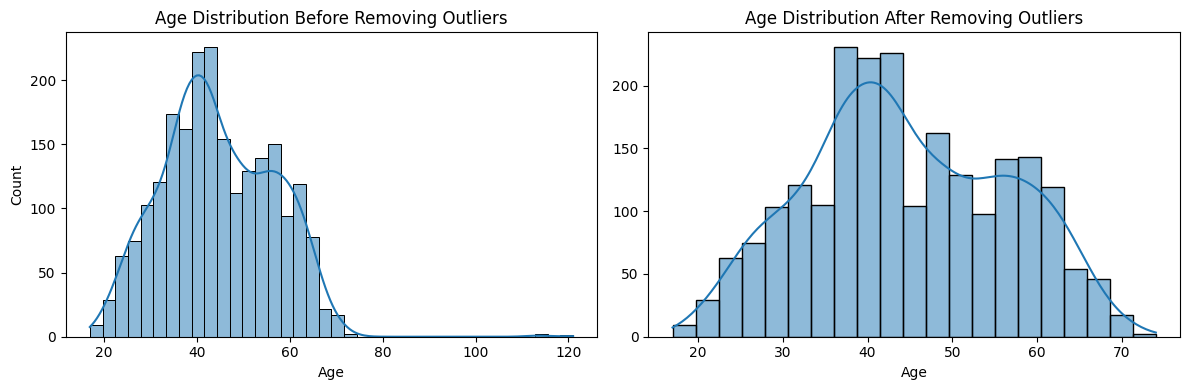

In [27]:
# Age distribution before and after removing outliers
plt.figure(figsize= (12, 4))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(data= age_with_outliers, x="Age", kde= True)
plt.title("Age Distribution Before Removing Outliers")

# After removing outliers
plt.subplot(1, 2, 2)
sns.histplot(data= df, x="Age", kde= True)
plt.title("Age Distribution After Removing Outliers")
plt.ylabel("")

plt.tight_layout()
plt.show()

It can be observed from the above visualization that the skewness in the age distribution is significantly reduced after removing the outliers.

Let us categorize the ages into different categories by adding a new column to our dataset named as "Age_Category," which will be used later in our analysis.

Create four age categories:
*   0 to 25: Youth / Students
*   26 to 40: Young Adults
*   41 to 60: Middle-aged
*   Above 60: Elderly





In [28]:
def age_conditions(df):
  """
  This function categorizes age into different groups

  Args:
  - df: DataFrame containing an 'Age' column.

  Returns:
    - Age category (str): Categorized age groups
    """
  if df["Age"] <= 25:
      return "0 to 25"
  elif df["Age"] <= 40:
      return "26 to 40"
  elif df["Age"] <= 60:
      return "41 to 60"
  else:
      return "Above 60"

In [29]:
# Create a new column "Age_Category" using the above function
df.loc[:, "Age_Category"] = df.apply(age_conditions, axis= 1)

In [30]:
# Verify the new column
print(df[["Age", "Age_Category"]].head())

   Age Age_Category
0   44     41 to 60
1   53     41 to 60
2   56     41 to 60
3   47     41 to 60
4   25      0 to 25


In [31]:
# Check the count of all age categories
df["Age_Category"].value_counts()

Age_Category
41 to 60    1093
26 to 40     768
Above 60     238
0 to 25      101
Name: count, dtype: int64

Now, we'll add a new column as "TotalAmountSpent". This will be equal to the total amount that the customer has spent on all the purchases from the store.

TotalAmountSpent = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds

In [32]:
df["TotalAmountSpent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + \
                          df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

df["TotalAmountSpent"].head()

0    1190
1     577
2     251
3      11
4      91
Name: TotalAmountSpent, dtype: int64

In [33]:
# Verify the datatypes and null values
def df_info():
  """
  This function generates a DataFrame containing information about the data-types,
  non-null values, and null values of each column in the DataFrame.

  Returns:
    DataFrame containing data type, non-null values, and null values for each
    column in the DataFrame.
  """
  func = pd.DataFrame(index = df.columns)
  func['data-type'] = df.dtypes
  func['Non-null values'] = df.count()
  func['Null values'] = df.isnull().sum()

  return func

print(df_info())

                          data-type  Non-null values  Null values
Id                            int64             2200            0
Year_Birth                    int64             2200            0
Education                    object             2200            0
Marital_Status               object             2200            0
Income                      float64             2200            0
Kidhome                       int64             2200            0
Teenhome                      int64             2200            0
Dt_Customer          datetime64[ns]             2200            0
Recency                       int64             2200            0
MntWines                      int64             2200            0
MntFruits                     int64             2200            0
MntMeatProducts               int64             2200            0
MntFishProducts               int64             2200            0
MntSweetProducts              int64             2200            0
MntGoldPro

**Detailed Overview of all manipulations and data wrangling performed:**

Data wrangling was performed to ensure that the data is suitable for analysis and to prevent data from distorting the accuracy of the analysis. The following steps taken are as follows as:

- In the 'Income' column, there were a few missing values. Upon analyzing the data distribution, it was observed that the data is positively skewed, with most incomes falling in the range of 0 to 100,000. Measures of central tendency were calculated to determine the best approach for imputing the missing values. Since the number of missing values were quite small, they were simply dropped. Then, customers who earns an income upto 100k were identified and included to understand their spending bhaviours better.

- Most variables were in the correct datatype, but the column 'Dt_Customer' was observed to be in an incorrect datatype and contained invalid date enteries in the form of '########'. There were 896 rows with these invalid dates. Since the customers enrollment data spanned the years b/w 2012 and 2014, the invalid dates were replaced with most recent date within this period for consistency and to avoid using random date values.

- To analyze the distribution of customer demographics based on age, the age was calculated by subtracting the 'Year_Birth' column from the 'Dt_Customer' column (date of enrollment). Upon analyzing the statistics for 'Age', it was noted that the maximum age of a customer was 121, who recently made a purchase on '2014-05-17' according to the data, which seemed unusual for a superstore dataset.
Upon further analysis of the data distribution, it was observed that the data exhibited positive skewness, with most ages falling within the range of 17 to 80. To address this, it was assumed that the maximum age of customers is 80 and a threshold was set accordingly. Based on this assumption, customers above 80 years of age were identified and categorized as elderly, and rows were dropped from the dataset to reduce skewness. After removing these outliers, a significant reduction in data skewness was observed.
Subsequently, the ages were categorized into four groups:

<center>

| Age Range | Category         |
|:---------:|:----------------:|
| 0 to 25   | Youth / Students |
| 26 to 40  | Young Adults     |
| 41 to 60  | Middle-aged      |
| Above 60  | Elderly          |

</center>

> This categorization helps in better understanding and analyzing customer demographics based on age groups.

- Added a new column as "TotalAmountSpent" to analyze total amount spent by customers on all the purchases from the store using the following formula:

$TotalAmountSpent = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds$

---

The dataset appears to be clean now, hence it's ready to proceed with the analysis. If required, we can save the clean dataset for future use.

```
cleaned_data = df.to_csv("SuperStore Marketing Data (cleaned).csv")
```

In [34]:
# Customer demographics (Age, Education, Marital Status)
age_category = df['Age_Category'].value_counts()
education_status = df['Education'].value_counts()
marital_status = df['Marital_Status'].value_counts()

print(f"{age_category}\n\n{education_status}\n\n{marital_status}")

Age_Category
41 to 60    1093
26 to 40     768
Above 60     238
0 to 25      101
Name: count, dtype: int64

Education
Graduation    1110
PhD            474
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

Marital_Status
Married     854
Together    566
Single      468
Divorced    229
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


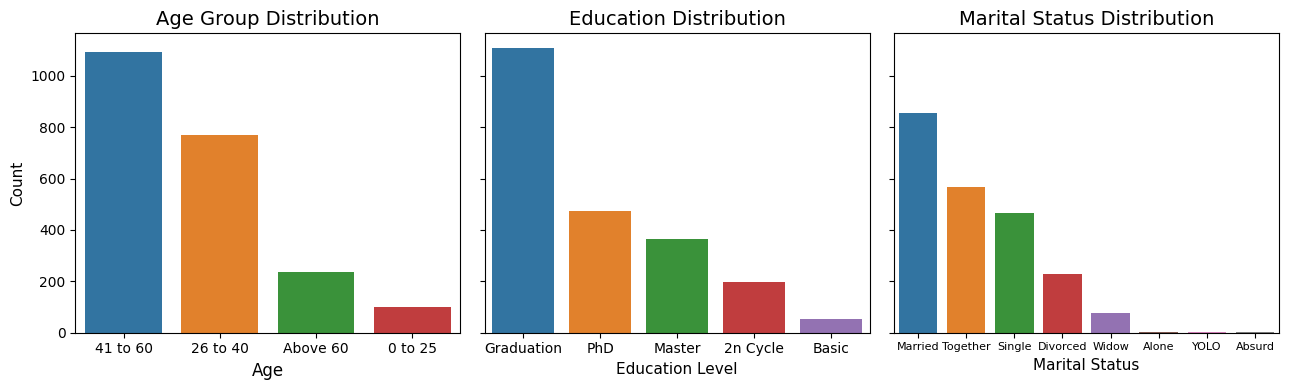

In [35]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize= (13, 4), sharey= True)

# Age Distribution
sns.barplot(x= age_category.index, y= age_category.values, palette= 'tab10',
            hue= age_category.index, ax= axes[0])

axes[0].set_title('Age Group Distribution', size= 14)
axes[0].set_xlabel('Age', size= 12)
axes[0].set_ylabel('Count', size= 11)

# Education Distribution
sns.barplot(x= education_status.index, y= education_status.values, palette= 'tab10',
            hue= education_status.index, ax= axes[1])

axes[1].set_title('Education Distribution', size= 14)
axes[1].set_xlabel('Education Level', size= 11)

# Marital Status Distribution
sns.barplot(x= marital_status.index, y= marital_status.values, palette= 'tab10',
            hue= marital_status.index, ax= axes[2])

axes[2].set_title('Marital Status Distribution', size= 14)
axes[2].set_xlabel('Marital Status', size= 11)
axes[2].tick_params(axis='x', labelsize= 8)

plt.tight_layout()
plt.show()

**Observations:**

Age Group Distribution:

The majority of customers fall within the age group of 41 to 60 years, indicating that middle-aged individuals are the primary customers for the superstore.

Education Level:

A significant proportion of customers are graduates. This suggests that the customer base is generally well-educated.

Marital Status:

Most customers are married. This demographic detail highlights that the majority of customers likely have family-oriented lifestyles, which might influence their purchasing behaviors.

**Recommendations for Bussiness Growth:**

Marketing Strategies:

As a large portion of the customers are middle-aged, marketing strategies can be tailored to address the needs and preferences of this age group. Products and services that cater to middle-aged individuals, such as family-oriented products, health-related items might be particularly appealing.

Targeted Educational Content:

With a high percentage of graduates, marketing content can be more detailed and informative, assuming that the audience is well capable of understanding and valuing such information. Additionally, products related to continuous education, professional development and technology might resonate well with this demographic.

Family-Centric Promotions:

Since most customers are married, promotions that emphasize family values, savings for households and family-friendly products could be more effective. Offering combo products, sales on household items, and baby-care product packs could be beneficial.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [36]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Age', 'Age_Category', 'TotalAmountSpent'],
      dtype='object')

In [37]:
# Select key numerical variables
variables = df[['Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
      'NumStorePurchases', 'NumWebVisitsMonth','Age']]

print(f"\n\t\t\t\t\033[1mTable: Summary of Basic Statistics\033[0m\n")
variables.describe().T


				Table: Summary of Basic Statistics



,count,mean,std,min,25%,50%,75%,max
Income,2200.0,51500.314545,20577.132323,1730.0,35178.0,51222.5,68130.0,98777.0
Kidhome,2200.0,0.443182,0.537328,0.0,0.0,0.0,1.0,2.0
Teenhome,2200.0,0.507727,0.544462,0.0,0.0,0.0,1.0,2.0
Recency,2200.0,49.041818,28.932517,0.0,24.0,49.0,74.0,99.0
MntWines,2200.0,305.647727,337.213549,0.0,24.0,177.5,505.0,1493.0
MntFruits,2200.0,26.287273,39.604597,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2200.0,165.328182,217.914581,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2200.0,37.680909,54.763031,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2200.0,26.870455,40.618390,0.0,1.0,8.0,33.0,198.0
MntGoldProds,2200.0,43.891818,51.554499,0.0,9.0,25.0,56.0,321.0


In [38]:
# Calculate measures of central tendency

def central_tendency_measures(variables):
  """
  This function calculates the measures of central tendency (mean, median, mode)
  for each variable in the DataFrame.

  Parameters:
    variables: List of key variables selected to calculate the measures of central tendency.

  Returns:
    ct_measures: Dictionary containing the central tendency measures for each variable.
  """
  ct_measures = {}
  for variable in variables:
    ct_measures[variable] = {
        'Mean': round(df[variable].mean(), 2),
        'Median': df[variable].median(),
        'Mode': df[variable].mode().iloc[0]
    }

  return ct_measures

ct_measures_result = central_tendency_measures(variables)

# Convert the dictionary to a DataFrame
central_tendency_df = pd.DataFrame(ct_measures_result)
print(f"\n\t\033[1mTable: Measures of Central Tendency\033[0m\n")

central_tendency_df.T


	Table: Measures of Central Tendency



,Mean,Median,Mode
Income,51500.31,51222.5,7500.0
Kidhome,0.44,0.0,0.0
Teenhome,0.51,0.0,0.0
Recency,49.04,49.0,56.0
MntWines,305.65,177.5,2.0
MntFruits,26.29,8.0,0.0
MntMeatProducts,165.33,68.0,7.0
MntFishProducts,37.68,12.0,0.0
MntSweetProducts,26.87,8.0,0.0
MntGoldProds,43.89,25.0,4.0


In [39]:
# Calculate measures of dispersion

def dispersion_measures(variables):
  """
  This function calculates the measures of dispersion (range, std. deviation and variance)
  for each variable in the DataFrame.

  Parameters:
    variables: List of key variables selected to calculate the measures of dispersion.

  Returns:
    dp_measures: Dictionary containing the dispersion measures for each variable.
  """
  dp_measures = {}

  for variable in variables:
    dp_measures[variable] = {
        'Range': df[variable].max() - df[variable].min(),
        'Standard Deviation': df[variable].std(),
        'Variance': df[variable].var(),
    }

  return dp_measures

dp_measures_result = dispersion_measures(variables)

# Convert the dictionary to a DataFrame
dispersion_df = pd.DataFrame(dp_measures_result)
print(f"\n\t\t\033[1mTable: Measures of Dispersion\033[0m\n ")

dispersion_df.T


		Table: Measures of Dispersion
 


,Range,Standard Deviation,Variance
Income,97047.0,20577.132323,4.234184e+08
Kidhome,2.0,0.537328,2.887211e-01
Teenhome,2.0,0.544462,2.964387e-01
Recency,99.0,28.932517,8.370906e+02
MntWines,1493.0,337.213549,1.137130e+05
MntFruits,199.0,39.604597,1.568524e+03
MntMeatProducts,1725.0,217.914581,4.748676e+04
MntFishProducts,259.0,54.763031,2.998990e+03
MntSweetProducts,198.0,40.618390,1.649854e+03
MntGoldProds,321.0,51.554499,2.657866e+03


**Identifying Outliers:**

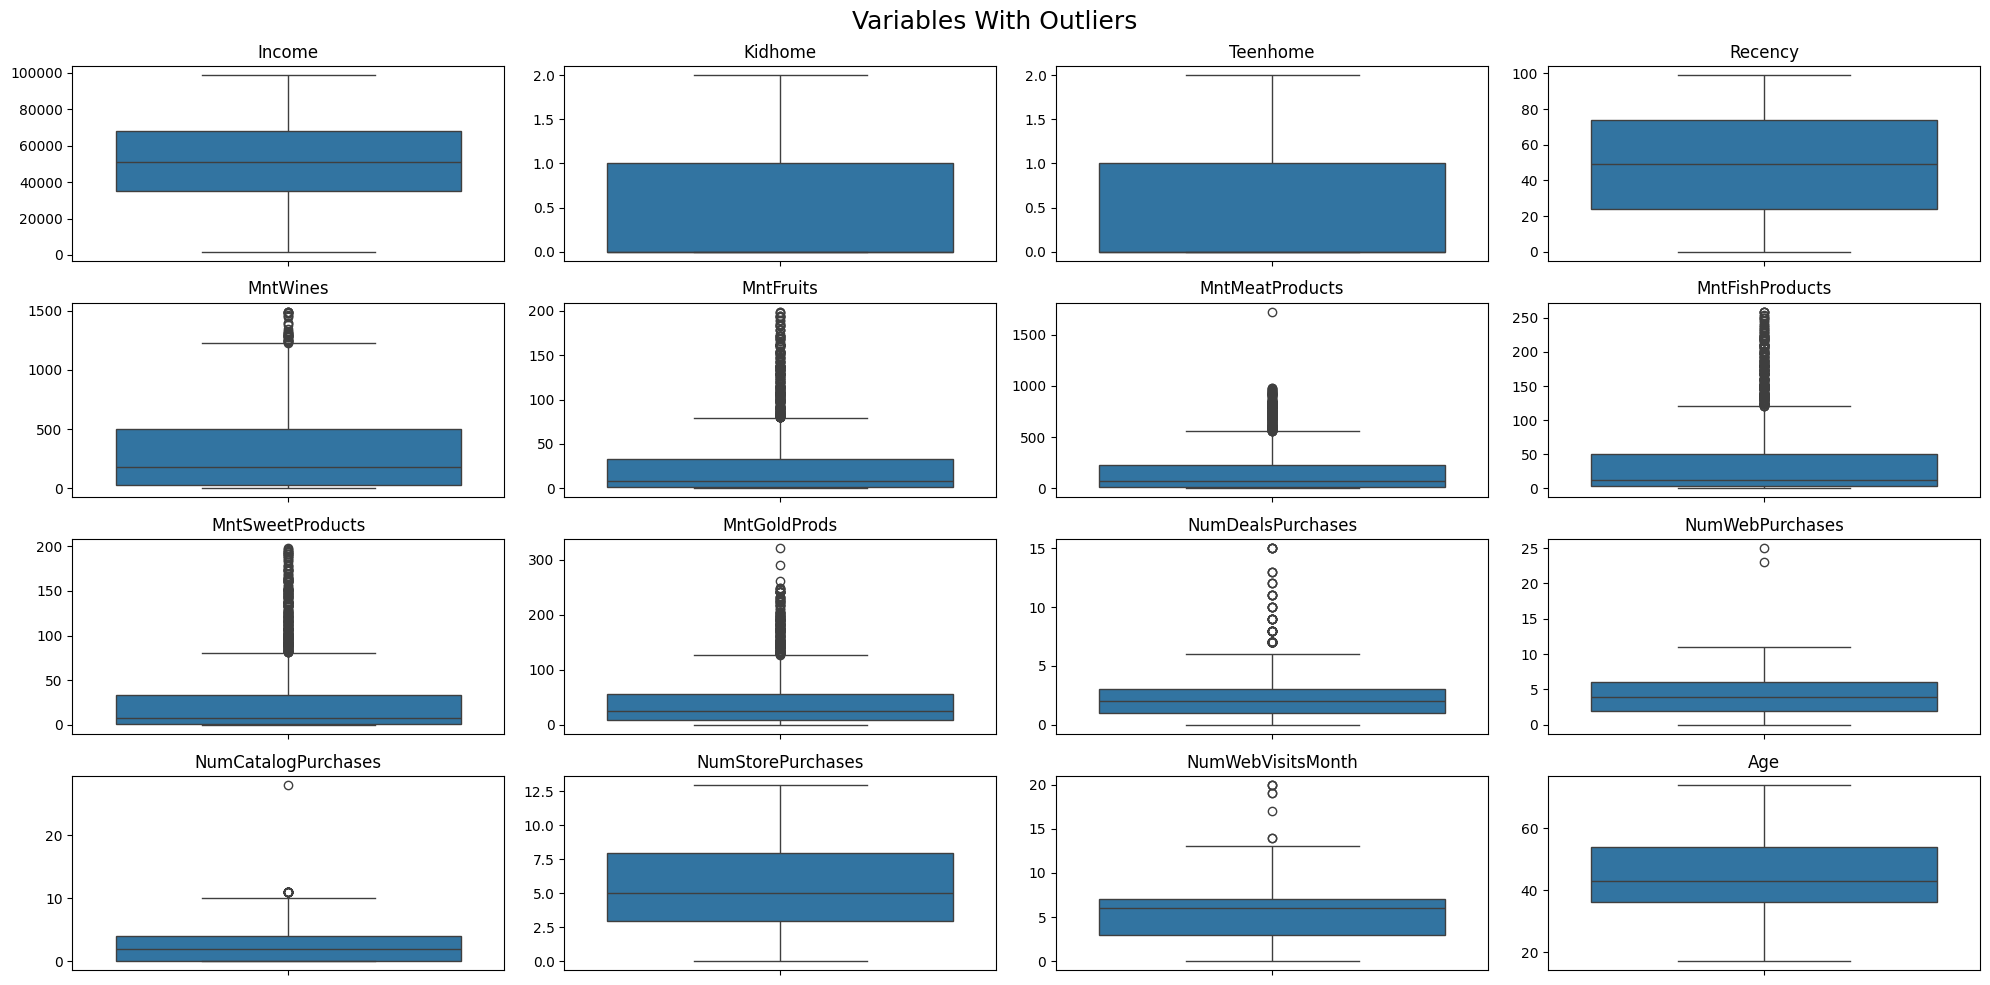

In [40]:
# Create a box plot to visualize outliers
plt.figure(figsize= (20, 10))

for i, column in enumerate(variables.columns):
  ax = plt.subplot(4, 4, i + 1)
  sns.boxplot(data= df[column], ax= ax)
  ax.set_title(column)
  plt.suptitle("Variables With Outliers", size= 18)
  plt.xlabel('')
  plt.ylabel('')
  plt.tight_layout()

plt.show()

> **Conclusion:**

 We can observe several outliers in the purchase amounts for certain products. These outliers could represent genuine cases and should be retained as they may provide valuable insights into customer spending patterns and behaviours.

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

To identify the probability distributions for different variables, let us first categorize the relevant variables into two groups:

1. Discrete Variables (Binary)

*   Response
*   Complain

2. Continuous Variables

*   Income
*   MntFishProducts
*   MntMeatProducts
*   MntFruits
*   MntSweetProducts
*   MntWines
*   MntGoldProds

**-- > Discrete Variables:**

For this, we will follow the convention for determining the probability distribution for discrete data:

Check the binary data assumptions. If the assumptions hold, we can infer that the data follows a Binomial Distribution.

**- Binomial Distribution**

**Binary Data - Assumptions:**

1. There are only two possible outcomes per trial. For example, Yes or No.
2. Each trial is independent, which means the outcome of one trial does not influence the outcome of another trial. For example; When flipping a coin, the result of one flip doesn't affect the next flip.
3. The probability remains constant over time.
4. The number of trials is fixed.

**Variables:** These are the two binary variables in the data:

- Response
- Complain

Let us go through each assumption one by one for both the variables to confirm them and make our inference accordingly...

1. Two Possible Outcomes - Check ✔

  Each variable has only two possible outcomes; 1 and 0.

2. Independent Trials - Check ✔

  One customer accepting the offer is independent of another customer's offer acceptance. Similarly, one customer complaining is independent of another customer complaining.

3. Constant Probability - Check ✔

  Each customer has an equal probability of either accepting or not accepting the offer. The same applies to whether a customer raises a complaint or not.

4. Fixed Trials - Check ✔

  The dataset contains a fixed number of rows. So, we can assume that the number of trials (records) is fixed.

**Inference:**
Based on the above analysis, we can infer that the both the discrete variables ('Response' and 'Complain') follows the binomial probability distribution.

> **Calculation of Probabilities and Expected Values for Binomial Distribution:**




**Calculation of Probabilities:**

**Assumption:** We assume a 50% probability for each trial. For every purchase that the customer makes, they have an equal probability of either accepting the offer or not accepting it (Response = 1 or 0 respectively) and raising a complaint or not (Complain = 1 or 0 respectively).

Therefore for both the variables; 'Response' and 'Complain':
$$p= 0.5$$

**Calculation of Expected Value:**

$$E(X) = np$$

where:

$n$ = number of independent bernoulli trials (total number of records = 2200)

$p$ = Probability of success in each trial (in our case, $p = 0.5$)

Therefore,
$$E(X) = 2200 * 0.5 = 1100$$


**Conclusion:** From the above calculation, it is concluded that the probabilty, $p = 0.5$ and expected value, $E(X) = 1100$ for the discrete variables in the binomial distribution.

---

**--> Continuous Variables:**

**Variables:** The continuous variables in the dataset are as follows as:
- Income
- MntFishProducts
- MntMeatProducts
- MntFruits
- MntSweetProducts
- MntWines
- MntGoldProds

**- Normal Distribution:**

For the above continuous variables, we will check whether they follow a normal distribution. To do this, we will use the ***`Shapiro-Wilk test`*** to test our hypothesis that the data follows a normal distribution. We will also visualize this using a QQ (Quantile-Quantile) plot to confirm our hypothesis.

**Formulate the Hypothesis:**

> $H_0: $The data follow the Normal distribution.  
> $H_1: $The data do not follow the Normal distribution.

We will assume the significance level, $\alpha = 0.05$ for all the tests.

In [41]:
# Shapiro-Wilk Test for normality

def shapiro_wilk_test_for_normality(df, column_name, alpha):
  """
  This function performs the Shapiro-Wilk test for normality on a specified column of a DataFrame.

  Args:
    df: The DataFrame containing the data.
    column_name: The name of the column to test for normality.
    alpha: The significance level to use for the test (e.g., 0.05).

  Returns:
    result: The result of the hypothesis test indicating whether to reject or fail to reject the null hypothesis.
  """
  test_data = df[column_name]
  shapiro_stat = shapiro(test_data)

  if shapiro_stat[1] < alpha:
    result = "Reject the Null Hypothesis. The data do not follow Normal Distribution."
  else:
    result = "Fail to reject the Null Hypothesis. The data follow Normal Distribution."

  return result

In [42]:
# Hypothesis Testing
normality_check_list = df[["Income", "MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds"]]

test_result = []

for column in normality_check_list:
  # Use the custom function: shapiro_wilk_test_for_normality
  output = shapiro_wilk_test_for_normality(df= df, column_name= column, alpha= 0.05)
  test_result.append(output)

# Create a result summary table
result_table = pd.DataFrame({"Variable": normality_check_list.columns, "Test_Result": test_result})
result_table

,Variable,Test_Result
0,Income,Reject the Null Hypothesis. The data do not fo...
1,MntFishProducts,Reject the Null Hypothesis. The data do not fo...
2,MntMeatProducts,Reject the Null Hypothesis. The data do not fo...
3,MntFruits,Reject the Null Hypothesis. The data do not fo...
4,MntSweetProducts,Reject the Null Hypothesis. The data do not fo...
5,MntWines,Reject the Null Hypothesis. The data do not fo...
6,MntGoldProds,Reject the Null Hypothesis. The data do not fo...


From the above table, it can be observed that none of the continuous variables follow the normal distribution. Therefore, we reject the Null Hypothesis.

Let us confirm this visually too using the QQ plot.

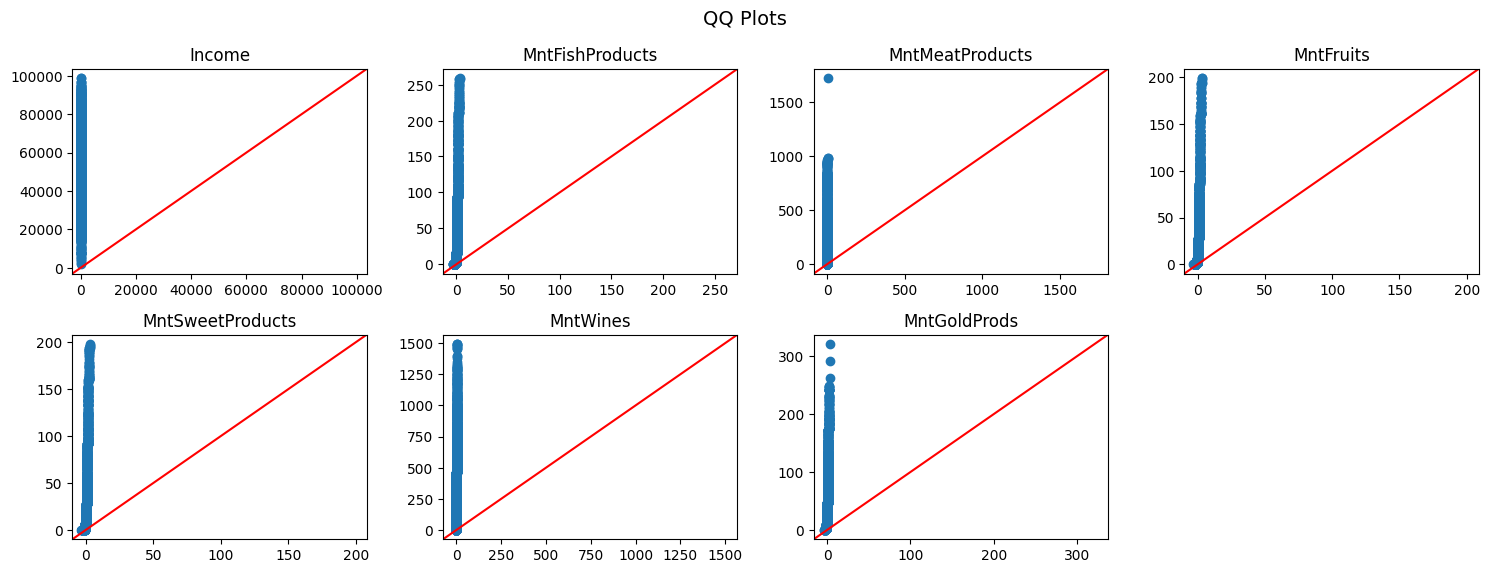

In [43]:
# Generating a QQ-plot to check the normality of continuous variables
plt.figure(figsize= (15, 6))

for i, column in enumerate(normality_check_list):
  ax = plt.subplot(2, 4, i + 1)
  sm.qqplot(data= df[column], line='45', ax= ax)
  ax.set_title(column)
  plt.suptitle("QQ Plots", size= 14)
  plt.tight_layout()
  plt.xlabel('')
  plt.ylabel('')

plt.show()

It can be observed from the above visualization that none of the variables follow a normal distribution, corroborating our inference from the Shapiro-Wilk test.

Additionally, let us have a quick look at the histograms of the continuous variables to see the shape of the data distribution.

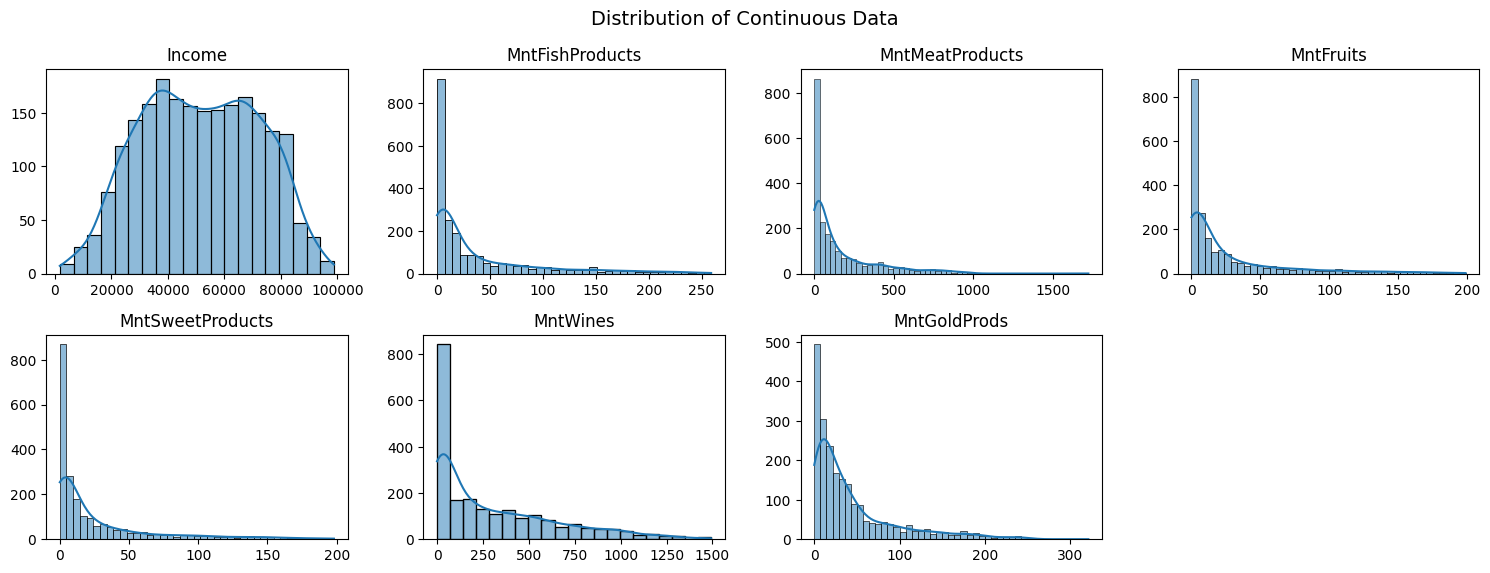

In [44]:
# Histograms to check data distribution
plt.figure(figsize=(15, 6))

for i, column in enumerate(normality_check_list):
  ax = plt.subplot(2, 4, i + 1)
  sns.histplot(data= df[column], kde= True, ax= ax)
  ax.set_title(column)
  plt.suptitle("Distribution of Continuous Data", size= 14)
  plt.tight_layout()
  plt.xlabel('')
  plt.ylabel('')

plt.show()

> **Conclusion:**

Even though the 'Income' data resembles a normal distribution, it is not perfectly normally distributed and hence failed the Shapiro-Wilk test for normality. This suggests that while the data may have a roughly bell-shaped curve, it does not meet the strict criteria required for a normal distribution according to the Shapiro-Wilk test. Therefore, we need to consider this limitation when performing further statistical analysis that assume normality.

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

### **Chart - 1 (Customer Demographics (Age, Education, Marital Status) vs. Total and Average Amount Spent)**

* ***Customer Demographics vs. Total Amount Spent***

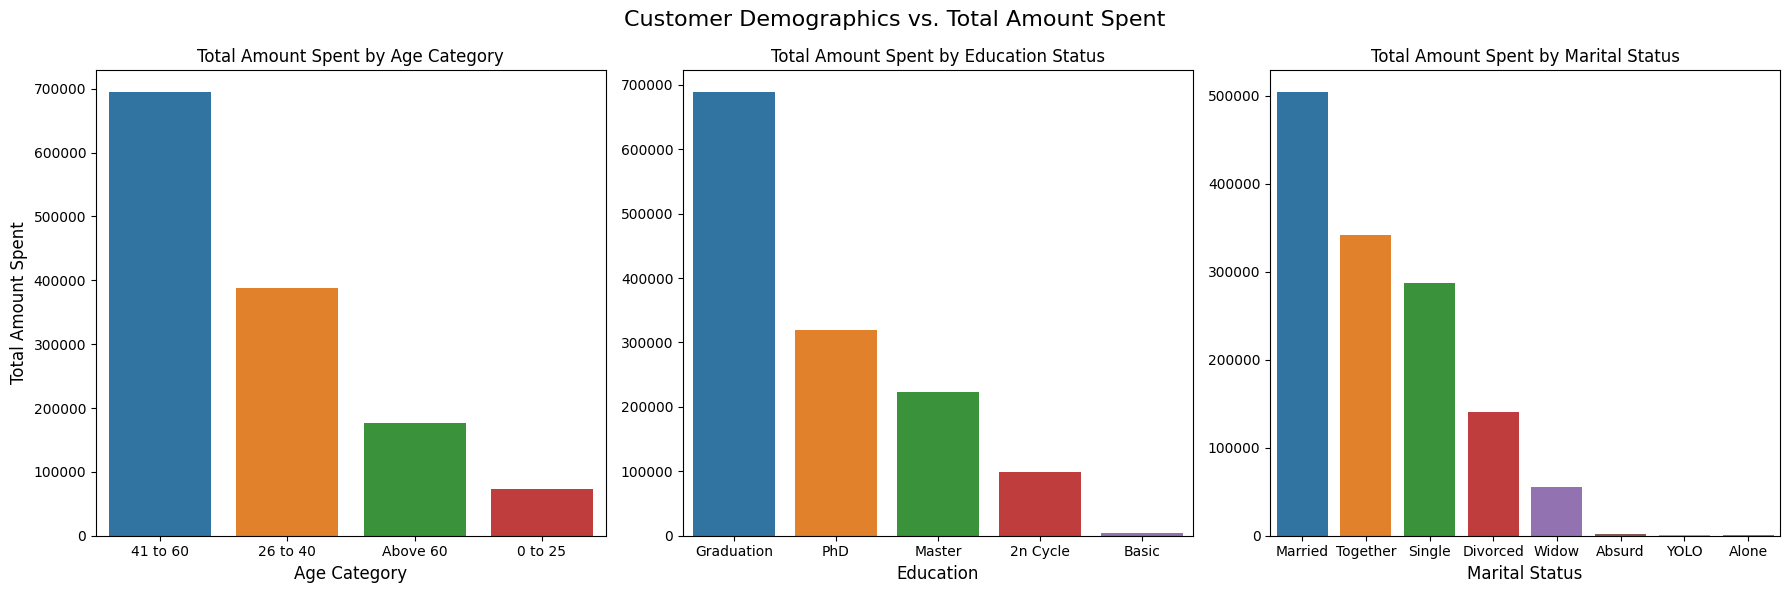

In [45]:
plt.figure(figsize= (18, 6))

# Calculate total amount spent by age category
total_amount_spent_age = df.groupby('Age_Category')['TotalAmountSpent'].sum().sort_values(ascending= False).reset_index()

# Plot the chart
plt.subplot(1, 3, 1)
sns.barplot(data= total_amount_spent_age, x='Age_Category', y='TotalAmountSpent',
            hue= 'Age_Category', palette= 'tab10')
plt.title('Total Amount Spent by Age Category', size= 12)
plt.xlabel('Age Category', size= 12)
plt.ylabel('Total Amount Spent', size= 12)

# Calculate total amount spent by education status
total_amount_spent_edu = df.groupby('Education')['TotalAmountSpent'].sum().sort_values(ascending= False).reset_index()

# Plot the chart
plt.subplot(1, 3, 2)
sns.barplot(data= total_amount_spent_edu, x='Education', y='TotalAmountSpent',
            hue= 'Education', palette= 'tab10')
plt.title('Total Amount Spent by Education Status', size= 12)
plt.xlabel('Education', size= 12)
plt.ylabel('')

# Calculate total amount spent by marital status
total_amount_spent_mar = df.groupby('Marital_Status')['TotalAmountSpent'].sum().sort_values(ascending= False).reset_index()

# Plot the chart
plt.subplot(1, 3, 3)
sns.barplot(data= total_amount_spent_mar, x='Marital_Status', y='TotalAmountSpent',
            hue= 'Marital_Status', palette= 'tab10')
plt.title('Total Amount Spent by Marital Status', size= 12)
plt.xlabel('Marital Status', size= 12)
plt.ylabel('')

plt.suptitle('Customer Demographics vs. Total Amount Spent', size= 16)
plt.tight_layout()

plt.show()

**Insights:**

The insights drawn from the chart are as follows:

- Age Category: The highest total amount spent by customers is in the age group of 41 to 60 years.
- Education Level: Customers with a graduation degree spend the most.
- Marital Status: Married customers have the highest total spending.

These insights highlight key demographic segments that contribute significantly to total spending, which can inform targeted marketing and product strategies.

* ***Customer Demographics vs. Average Amount Spent***

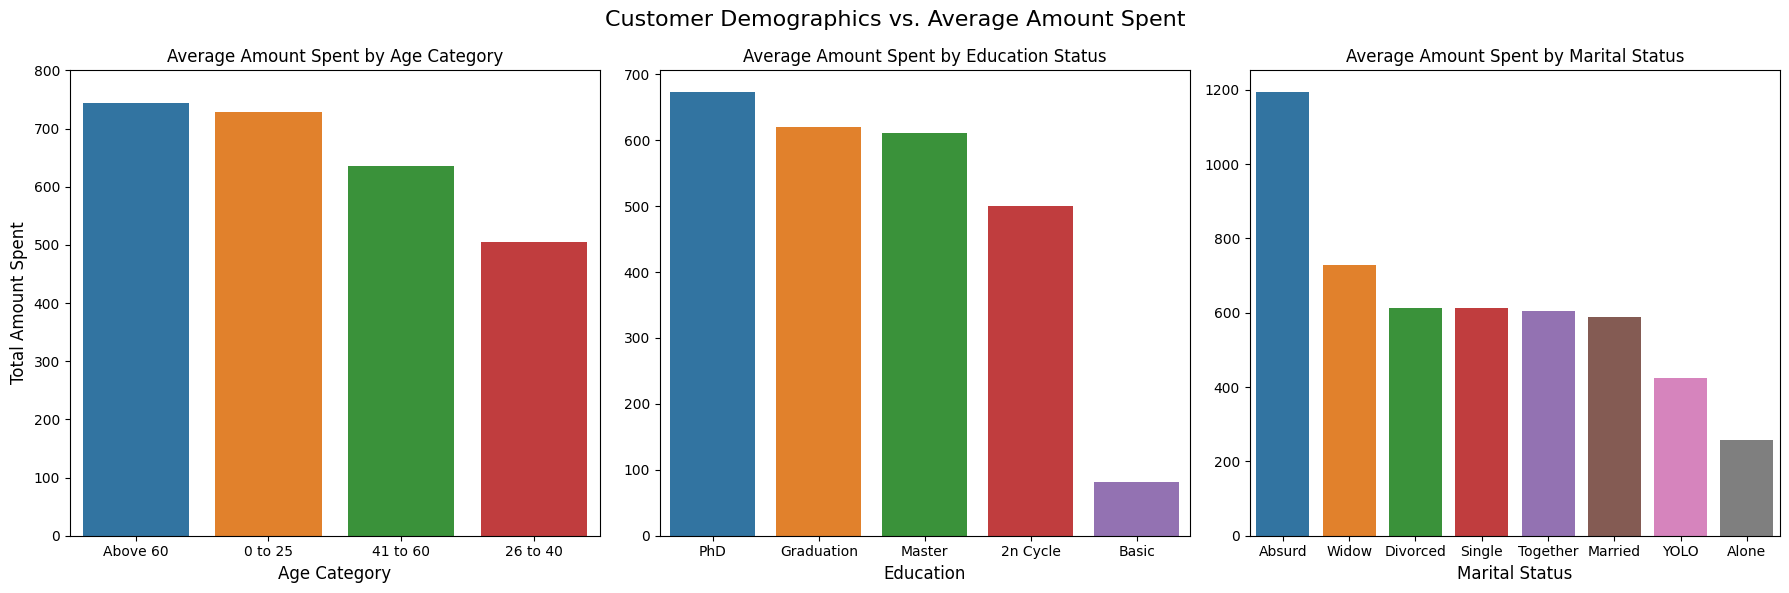

In [46]:
plt.figure(figsize=(18, 6))

# Calculate average amount spent by age category
avg_amount_spent_age = df.groupby('Age_Category')['TotalAmountSpent'].mean().sort_values(ascending=False).reset_index()

# Plot the chart
plt.subplot(1, 3, 1)
sns.barplot(data= avg_amount_spent_age, x='Age_Category', y='TotalAmountSpent',
            hue= 'Age_Category', palette= 'tab10')
plt.title('Average Amount Spent by Age Category', size= 12)
plt.xlabel('Age Category', size= 12)
plt.ylabel('Total Amount Spent', size= 12)
plt.ylim(0, 800)

# Calculate average amount spent by education status
avg_amount_spent_edu = df.groupby('Education')['TotalAmountSpent'].mean().sort_values(ascending=False).reset_index()

# Plot the chart
plt.subplot(1, 3, 2)
sns.barplot(data= avg_amount_spent_edu, x='Education', y='TotalAmountSpent',
            hue= 'Education', palette= 'tab10')
plt.title('Average Amount Spent by Education Status', size= 12)
plt.xlabel('Education', size= 12)
plt.ylabel('')

# Calculate average amount spent by marital status
avg_amount_spent_mar = df.groupby('Marital_Status')['TotalAmountSpent'].mean().sort_values(ascending=False).reset_index()

# Plot the chart
plt.subplot(1, 3, 3)
sns.barplot(data= avg_amount_spent_mar, x='Marital_Status', y='TotalAmountSpent',
            hue= 'Marital_Status', palette= 'tab10')
plt.title('Average Amount Spent by Marital Status', size= 12)
plt.xlabel('Marital Status', size= 12)
plt.ylabel('')

plt.suptitle('Customer Demographics vs. Average Amount Spent', size= 16)
plt.tight_layout()

plt.show()

**Insights:**

The average amount spent by different customer demographic categories provides distinct insights compared to the total amount spent. Notably, the highest average total amount spent is observed in the following customer categories:

- Age Category: Customers aged above 60 years, followed closely by those aged 0 to 25 years.
- Education Level: Customers with a PhD spend the most on average, with those holding a Graduation or Master's degree spending slightly less but nearly equal.
- Marital Status: Interestingly, customers categorized as "Absurd" in marital status show high spending patterns.

### **Chart - 2 (Income vs. Total Amount Spent)**

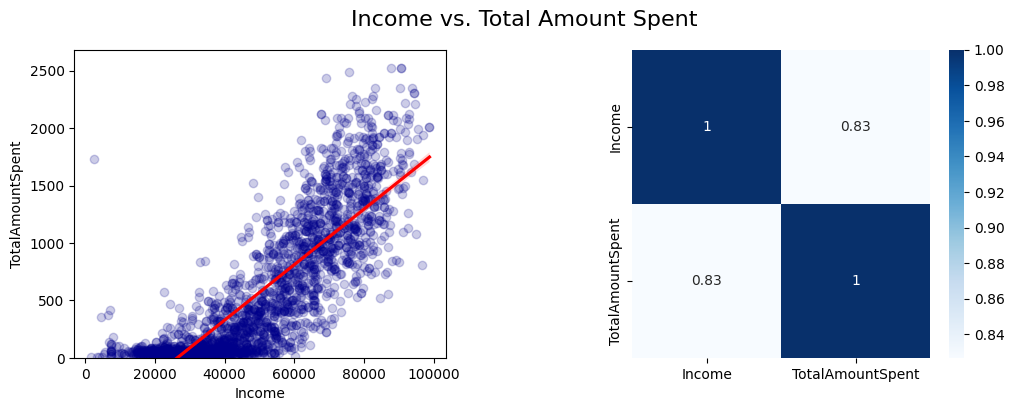

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12,4))

fig.suptitle("Income vs. Total Amount Spent", fontsize= 16)

# Regression Plot
sns.regplot(data= df, x="Income", y="TotalAmountSpent", scatter_kws= {"color":"darkblue", "alpha":0.2}, line_kws= {"color":"red"}, ax= ax1)
ax1.set_ylim(0)

# Heatmap
sns.heatmap(data= df[["Income", "TotalAmountSpent"]].corr(), annot= True, cmap="Blues", ax= ax2)
plt.subplots_adjust(wspace= 0.5)

plt.show()

**Insights:**

It can be observed that there is a strong positive correlation between the income of customers and the total amount they spend at the store. This suggests that customers with higher incomes tend to spend more on products offered by the store.

### **Chart - 3 (Common Mode of Purchase w.r.t. Offer Acceptance / Rejection)**

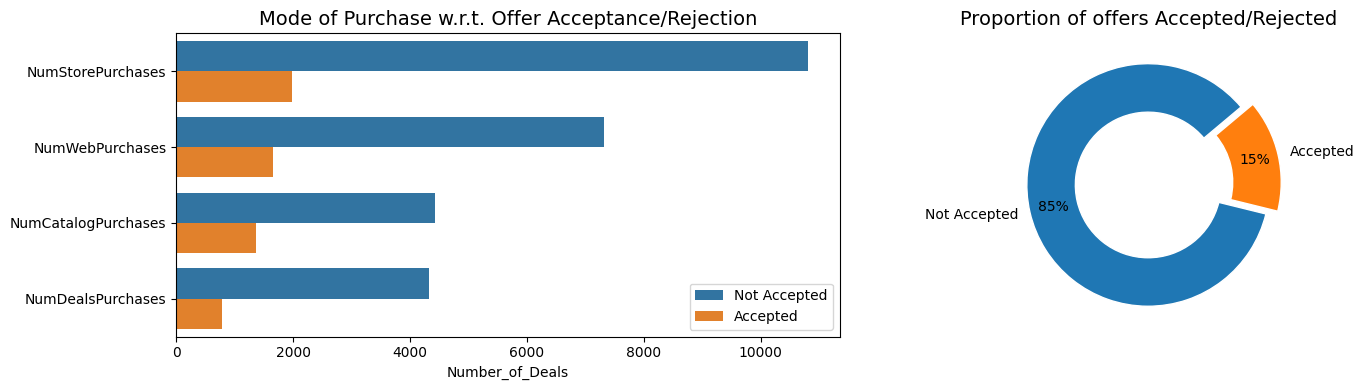

In [48]:
# Analyze mode of purchase

# Prepare the data
purchase_melted_df = pd.melt(df[["Education", "Marital_Status", "Age_Category", "Response",
                                 "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]],
  id_vars=["Education", "Marital_Status", "Age_Category", "Response"], var_name="Mode_of_Purchase", value_name="Number_of_Deals")

# Plot the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (15, 4))

# Sum the number of deals for each mode of purchase and response
purchase_mode = purchase_melted_df.groupby(["Mode_of_Purchase", "Response"])["Number_of_Deals"].sum(). \
          sort_values(ascending= False).reset_index()

# Bar Plot
sns.barplot(data= purchase_mode, x="Number_of_Deals", y="Mode_of_Purchase", hue="Response", orient="h", ax= ax1)
ax1.set_title("Mode of Purchase w.r.t. Offer Acceptance/Rejection", fontsize= 14)
ax1.set_ylabel("")
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles= handles, labels= ["Not Accepted", "Accepted"])

# Analyze proportion of offers accepted/rejected
response_data = df["Response"].value_counts()

response_labels = {0: 'Not Accepted', 1: 'Accepted'}
# Map the complain_data index to the new labels
response_data.index = response_data.index.map(response_labels)

plt.pie(x= response_data.values, labels= response_data.index, explode= (0, 0.1), startangle= 40,
        wedgeprops= dict(width= 0.4, edgecolor='w'), autopct="%.0f%%", pctdistance= 0.8)
plt.title("Proportion of offers Accepted/Rejected", fontsize= 14)

plt.tight_layout()
plt.show()

**Insights:**

- The analysis of customer purchase modes indicates a clear preference for in-store purchases. Suggesting that customers favor the physical shopping experience.

- Web purchases emerge as the second most popular mode, maintaining a robust online shopping preference among customer segment.

- The pie chart analysis reveals that approximately 15% of customers accepted the offer in the latest campaign. Among those who accepted the offer, the majority preferred in-store purchases. This insight underscores the effectiveness of in-store promotions and the potential for increasing in-store customer engagement.

- Web purchases also contributed significantly among those who accepted the offer, indicating that online offers and promotions are also effective.

### **Chart  - 4 (Proportion of Customer's Complains)**

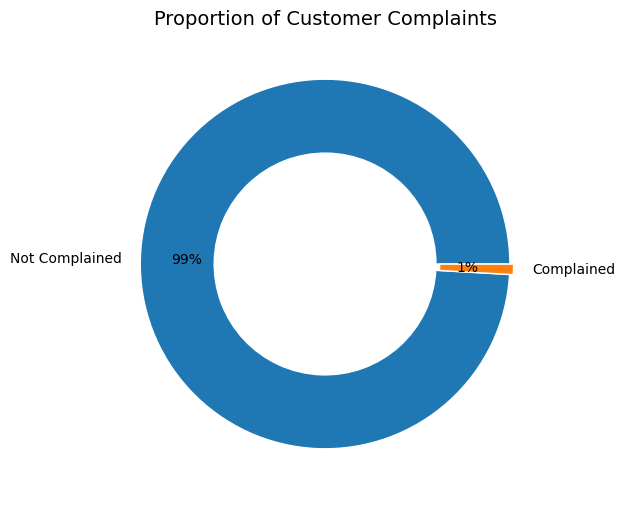

In [49]:
# Count values in complain column
complain_data = df["Complain"].value_counts()

# Create a mapping for the Complain values
complain_labels = {0: "Not Complained", 1: "Complained"}

# Map the complain_data index to the new labels
complain_data.index = complain_data.index.map(complain_labels)

plt.figure(figsize= (6, 6))
plt.pie(x= complain_data.values, labels= complain_data.index, explode= (0, 0.02),
        wedgeprops= dict(width= 0.4, edgecolor='w'), autopct="%.0f%%", pctdistance= 0.75)
plt.title("Proportion of Customer Complaints", fontsize= 14)

plt.show()

**Insights:**

Only about 1% of customers have registered complaints over the past two years. This low complaint rate is a strong indicator of overall customer satisfaction and contentment with the store's offerings.

### **Chart  - 5 (Spending Distribution Across Products)**

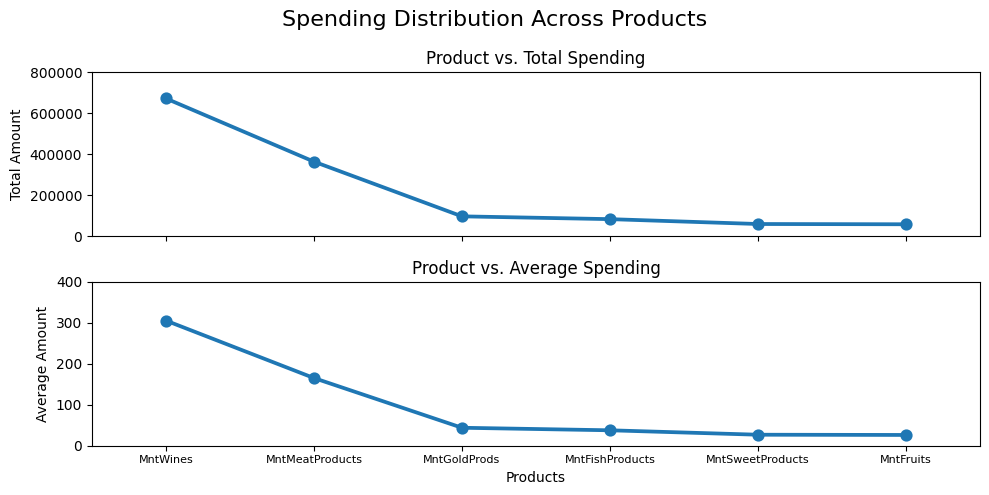

In [50]:
# Prepare the data
products_melted_df = pd.melt(df[["Education", "Marital_Status", "MntFishProducts", "MntMeatProducts",
                      "MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds", "Age_Category"]],
      id_vars=["Education", "Marital_Status", "Age_Category"], var_name="Product", value_name="Amount")

# Plot the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex= True)

fig.suptitle("Spending Distribution Across Products", fontsize= 16)

# Total amount
total_amount = products_melted_df.groupby("Product")["Amount"].sum().sort_values(ascending= False).reset_index()
sns.pointplot(data= total_amount, x="Product", y="Amount", ax= ax1)
ax1.set_title("Product vs. Total Spending")
ax1.set_ylabel("Total Amount")
ax1.set_ylim(0, 800000)
ax1.tick_params(axis='x', labelsize= 8)

# Average amount
avg_amount = products_melted_df.groupby("Product")["Amount"].mean().sort_values(ascending= False).reset_index()
sns.pointplot(data= avg_amount, x="Product", y="Amount", ax= ax2)
ax2.set_title("Product vs. Average Spending")
ax2.set_xlabel("Products")
ax2.set_ylabel("Average Amount")
ax2.set_ylim(0, 400)
ax2.tick_params(axis='x', labelsize= 8)

plt.tight_layout()
plt.show()

In terms of spending on products, it can be observed that customers spend the most on wines, followed by meat products, both in total and on average . Spending on all other products is comparatively lower. This visualization is crucial for understanding customer preferences on distinct products.

### **Chart  - 6 (Correlation between Childrens in Household and Total Amount Spent)**

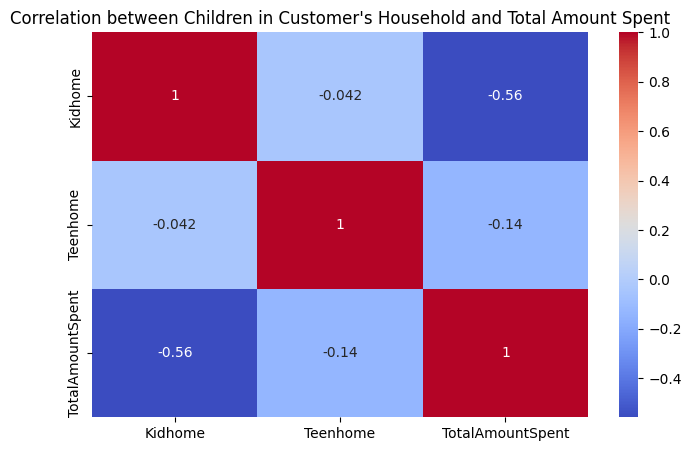

In [51]:
plt.figure(figsize= (8,5))

sns.heatmap(data= df[["Kidhome", "Teenhome", "TotalAmountSpent"]].corr(), annot= True, cmap="coolwarm")
plt.title("Correlation between Children in Customer's Household and Total Amount Spent", fontsize= 12)

plt.show()

**Insights:**

No significant relationship seems to exist between the number of children (kids or teens) in the customer's household and the total amount spent.

### **Chart  - 7 (Correlation between Number of Store Purchases and Website Purchases)**

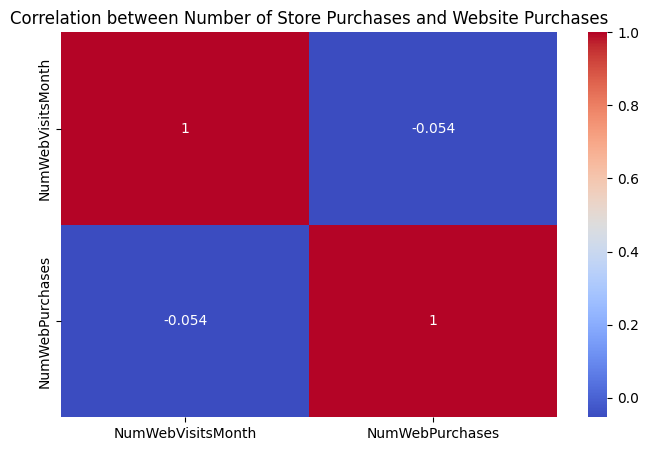

In [52]:
plt.figure(figsize=(8,5))

sns.heatmap(data= df[["NumWebVisitsMonth", "NumWebPurchases"]].corr(), annot= True, cmap="coolwarm")
plt.title("Correlation between Number of Store Purchases and Website Purchases", fontsize= 12)

plt.show()

**Insights:**

No significant relationship seems to exist between number of store purchases and number of website purchases.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

### **Summary of Insights:**

1. **Customer Demographics vs. Total and Average Amount Spent:**

- Total Spending Insights: Customers aged 41 to 60 years (middle-aged), graduates and married individuals were observed to be the highest spenders in terms of total amount spent.

- Average Spending Insights: Surprisingly, in terms of average amount spent, the highest spending customers were in the age groups 0 to 25 years and above 60, with slightly lower but comparable spending observed among PhD, Graduation and Master's degree holders.

2. **Income and Total Spending Correlation:** Income is positively correlated with total amount spent, indicating that customers with higher incomes tend to spend more.

3. **Preferred Purchase Modes:** In-store purchases were the most preferred mode of purchase among customers, followed by web purchases.

4. **Offer Acceptance and Purchase Modes:** Only 15% of customers accepted the offer, with the highest acceptance rates observed among customers making in-store purchases, followed by web purchases.

5. **Customer Satisfaction on Purchases:** Overall customer satisfaction appears to be high, as only about 1% of customers raised complaints in the last two years.

6. **Product Preferences:** Customers tend to allocate the highest expenditures towards wines followed by meat products, reflecting their product preferences.

7. **Household Composition:** There was no significant relationship observed between the number of children in the customer's household and the total amount spent.

8. **Store Visits and Web Purchases:** There was no significant correlation observed between the number of store visits and the purchases made on the website.



### **Recommendations:**

1. Targeted Marketing Strategies:

- Develop targeted marketing campaigns by leveraging customer segmentation based on age and education. Focus on high-spending age groups such as 41-60 years and above 60 years. For age group 0 to 25 tailor advertisements to resonate with their educational backgrounds, especially emphasizing graduates and individuals with higher degrees.
- Leverage the positive correlation between income and spending by offering premium products or exclusive discounts to high-income customers.

2. Enhanced Customer Experience:

- Since customer prefer in-store purchases, investing in improving store layout, providing customer handle service to staff and organizing exclusive in-store events to enhance customer satisfaction and potentially increase spending.
- Customers have slightly lower preference for website purchases, by enhancing the online shopping experience through personalized recommendations and improving the website user interface can increase online sales too.

3. Offer Acceptance Strategies:

- Since overall purchases observed through in-store and web, by providing offers, loyalty rewards and improve store visibility via word of mouth, hoardings, attractive store architecture can enhance customers engagement.
- Improving online visibility via registering on online marketplaces, personalized emails, social media marketing and advertisements can significantly increase acceptance rates.

4. Focus on Top-Selling Categories:

- Store should maintain inventory for top-selling categories like wines and meat products. Consider introducing premium or exclusive variants to capitalize on customer preferences.
- By conducting seasonal analysis to anticipate shifts in product preferences, market trends to introduce new products aligned with customer interests can improve customer satisfaction.

5. Customer Relationship Management:

- Despite of high customer satisfaction levels of 99%, maintain a proactive complaint management practices to carefully address the concerns of the 1% who raise complaints. Using these interactions as opportunities can earn customer's trust, loyalty and satisfaction.
- Continuous feedback from customers, both online and in-store, can help identify areas for improvement and showcase positive feedback as testimonials to attract new customers.

### **Conclusion:**

The Superstore Marketing Data provided valuable insights into customer behaviours and their spending habits. Through systematic analysis, various patterns and relationships were identified. The project encompassed the process, from understanding the business problem to data cleaning and removing outliers. The analysis also involved examining probability distributions, conducting hypothesis tests and performing exploratory data analysis. The resulting visualizations highlighted key insights, leading to practical recommendations for enhancing customer engagement and optimizing marketing strategies. This comprehensive approach ensured that the analysis was thorough and provided meaningful contributions to the business.